<b> Objective:</b> The major aim of this project is to gain insight into the sales data of Amazon to understand the different factors that affect sales of the different branches.

In [178]:
import pymysql
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [179]:
connection=pymysql.connect(host="localhost",user="root",password="sunshine",database="Amazon_Sales")

<b> Feature Engineering

In [7]:
cursor = connection.cursor()
query = "ALTER TABLE amazon ADD COLUMN timeofday VARCHAR(10)"
cursor.execute(query)
connection.commit()

In [8]:
cursor = connection.cursor()
query = "UPDATE amazon SET timeofday = CASE WHEN HOUR(payment_time) < 12 THEN 'Morning' WHEN HOUR(payment_time) >= 12 AND HOUR(payment_time) < 18 THEN 'Afternoon' ELSE 'Evening' END"
cursor.execute(query)
connection.commit()

In [9]:
cursor = connection.cursor()
query = "ALTER TABLE amazon ADD COLUMN dayname VARCHAR(3)"
cursor.execute(query)
connection.commit()

In [15]:
query = "UPDATE amazon SET dayname = UPPER(LEFT(DAYNAME(payment_date), 3))"
cursor.execute(query)
connection.commit()

In [11]:
cursor = connection.cursor()
query = "ALTER TABLE amazon ADD COLUMN monthname VARCHAR(3)"
cursor.execute(query)
connection.commit()

In [17]:
query = "UPDATE amazon SET monthname = UPPER(LEFT(MONTHNAME(payment_date), 3))"
cursor.execute(query)
connection.commit()

In [18]:
query = """select * from amazon"""

In [19]:
df=pd.read_sql(query,connection)

In [20]:
df

,Invoice ID,Branch,City,Customer_type,Gender,Product_line,Unit_price,Quantity,VAT,Total,payment_date,payment_time,Payment,cogs,gross_margin_percentage,gross_income,Rating,timeofday,dayname,monthname
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,75.0,7,26.0,548.9715,2019-01-05,0 days 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon,SAT,JAN
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.0,5,4.0,80.2200,2019-03-08,0 days 10:29:00,Cash,76.40,4.761905,3.8200,9.6,Morning,FRI,MAR
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.0,7,16.0,340.5255,2019-03-03,0 days 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Afternoon,SUN,MAR
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.0,8,23.0,489.0480,2019-01-27,0 days 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Evening,SUN,JAN
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.0,7,30.0,634.3785,2019-02-08,0 days 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Morning,FRI,FEB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.0,1,2.0,42.3675,2019-01-29,0 days 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Afternoon,TUE,JAN
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.0,10,49.0,1022.4900,2019-03-02,0 days 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Afternoon,SAT,MAR
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,32.0,1,2.0,33.4320,2019-02-09,0 days 13:22:00,Cash,31.84,4.761905,1.5920,7.7,Afternoon,SAT,FEB
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,66.0,1,3.0,69.1110,2019-02-22,0 days 15:33:00,Cash,65.82,4.761905,3.2910,4.1,Afternoon,FRI,FEB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   Invoice ID               1000 non-null   object         
 1   Branch                   1000 non-null   object         
 2   City                     1000 non-null   object         
 3   Customer_type            1000 non-null   object         
 4   Gender                   1000 non-null   object         
 5   Product_line             1000 non-null   object         
 6   Unit_price               1000 non-null   float64        
 7   Quantity                 1000 non-null   int64          
 8   VAT                      1000 non-null   float64        
 9   Total                    1000 non-null   float64        
 10  payment_date             1000 non-null   object         
 11  payment_time             1000 non-null   timedelta64[ns]
 12  Payment              

In [22]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer_type              0
Gender                     0
Product_line               0
Unit_price                 0
Quantity                   0
VAT                        0
Total                      0
payment_date               0
payment_time               0
Payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
Rating                     0
timeofday                  0
dayname                    0
monthname                  0
dtype: int64

In [23]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer_type                 2
Gender                        2
Product_line                  6
Unit_price                   91
Quantity                     10
VAT                          47
Total                       990
payment_date                 89
payment_time                506
Payment                       3
cogs                        990
gross_margin_percentage       1
gross_income                990
Rating                       61
timeofday                     3
dayname                       7
monthname                     3
dtype: int64

<b> 1. What is the count of distinct cities in the dataset?

In [26]:
q1 = """SELECT COUNT(DISTINCT city) AS count_of_city
FROM amazon;"""

In [27]:
data=pd.read_sql(q1,connection)

In [28]:
data

,count_of_city
0,3


<b> 2. For each branch, what is the corresponding city?

In [29]:
q2 = """SELECT branch, city
FROM amazon
GROUP BY branch, city;"""

In [30]:
data=pd.read_sql(q2,connection)

In [31]:
data

,branch,city
0,A,Yangon
1,C,Naypyitaw
2,B,Mandalay


<b> 3. What is the count of distinct product lines in the dataset?

In [32]:
q3 = """SELECT COUNT(DISTINCT Product_line) AS count_of_product_line
FROM amazon;"""

In [33]:
data=pd.read_sql(q3,connection)

In [34]:
data

,count_of_product_line
0,6


<b> 4. Which payment method occurs most frequently?

In [36]:
q4 = """SELECT Payment, COUNT(*) AS payment_method_count
FROM amazon
GROUP BY Payment
ORDER BY payment_method_count DESC
LIMIT 5;"""

In [37]:
data=pd.read_sql(q4,connection)

In [38]:
data

,Payment,payment_method_count
0,Ewallet,345
1,Cash,344
2,Credit card,311


<b> 5. Which product line has the highest sales?

In [39]:
q5 = """SELECT Product_line, COUNT(Product_line) AS sales
FROM amazon
GROUP BY Product_line
ORDER BY sales DESC
LIMIT 5;"""

In [40]:
data=pd.read_sql(q5,connection)

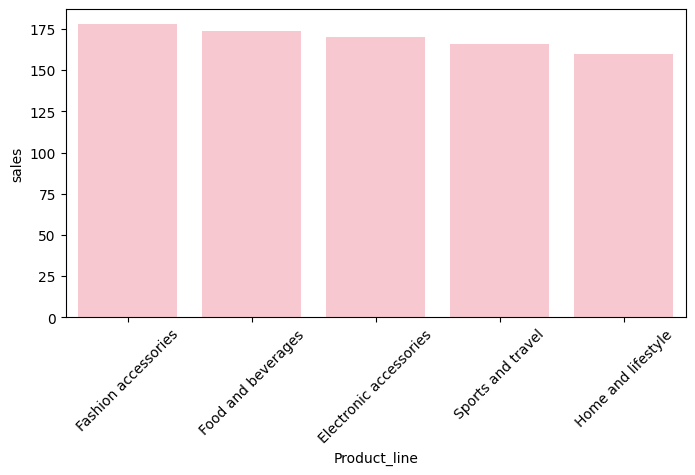

In [50]:
plt.figure(figsize=(8, 4))
sns.barplot(data=data,x='Product_line',y='sales', color='pink')
plt.xticks(rotation=45)
plt.show()

<b> 6. How much revenue is generated each month?

In [59]:
q6 = """SELECT monthname, SUM(quantity*unit_price) AS monthly_revenue
FROM amazon
GROUP BY monthname
ORDER BY monthly_revenue DESC;"""

In [60]:
data=pd.read_sql(q6,connection)

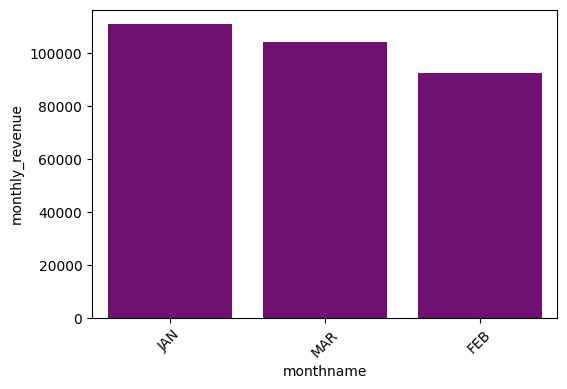

In [61]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data,x='monthname',y='monthly_revenue', color='purple')
plt.xticks(rotation=45)
plt.show()

<b> 7. In which month did the cost of goods sold reach its peak?

In [54]:
q7 = """SELECT monthname, SUM(cogs) AS monthly_cogs
FROM amazon
GROUP BY monthname
ORDER BY monthly_cogs DESC
LIMIT 5;"""

In [55]:
data=pd.read_sql(q7,connection)

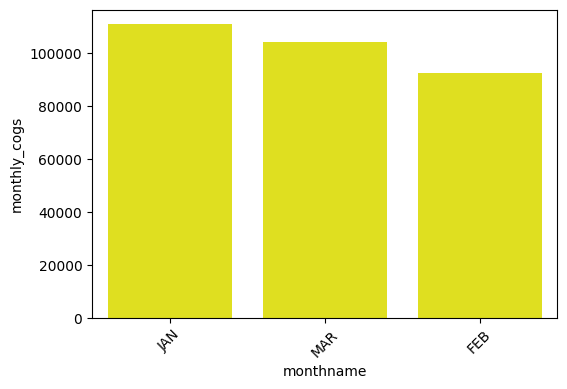

In [57]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data,x='monthname',y='monthly_cogs', color='yellow')
plt.xticks(rotation=45)
plt.show()

<b> 8. Which product line generated the highest revenue?

In [64]:
q8 = """SELECT product_line, SUM(quantity*unit_price) AS total_revenue
FROM amazon
GROUP BY product_line
ORDER BY total_revenue DESC
LIMIT 5;"""

In [65]:
data=pd.read_sql(q8,connection)

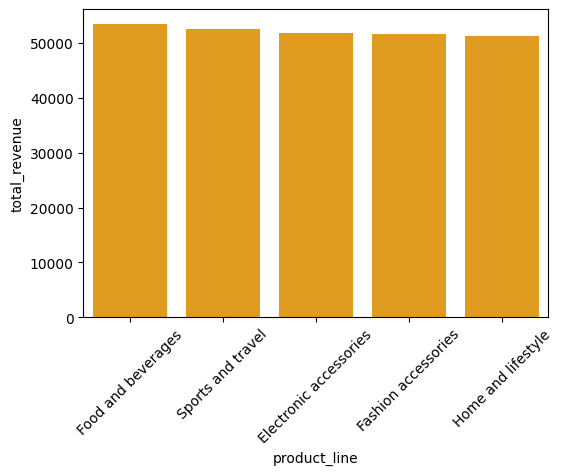

In [67]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data,x='product_line',y='total_revenue', color='orange')
plt.xticks(rotation=45)
plt.show()

<b> 9. In which city was the highest revenue recorded?

In [70]:
q9 = """SELECT city, SUM(quantity*unit_price) AS total_revenue
FROM amazon
GROUP BY city
ORDER BY total_revenue DESC
LIMIT 5;"""

In [71]:
data=pd.read_sql(q9,connection)

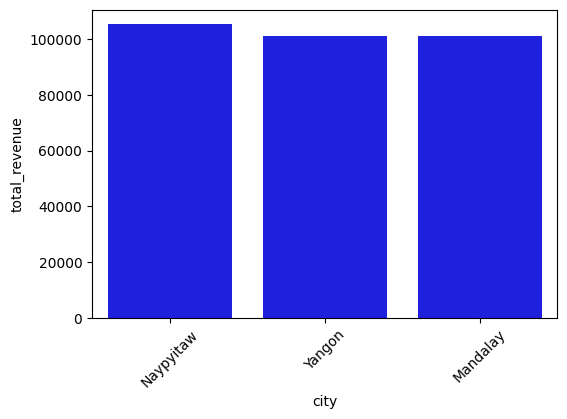

In [72]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data,x='city',y='total_revenue', color='blue')
plt.xticks(rotation=45)
plt.show()

<b> 10. Which product line incurred the highest Value Added Tax?

In [74]:
q10 = """SELECT product_line, SUM(vat) AS total_vat
FROM amazon
GROUP BY product_line
ORDER BY total_vat DESC
LIMIT 5;"""

In [75]:
data=pd.read_sql(q10,connection)

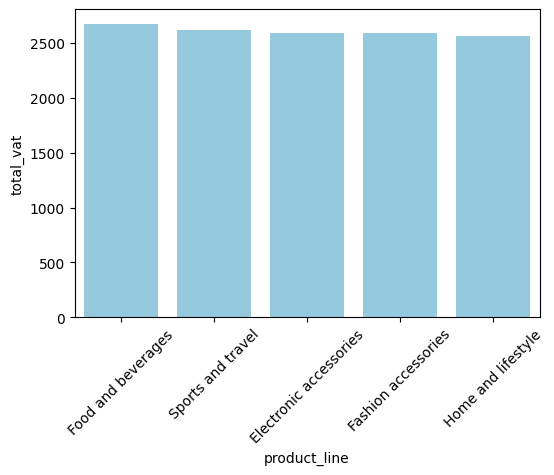

In [76]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data,x='product_line',y='total_vat', color='skyblue')
plt.xticks(rotation=45)
plt.show()

<b> 11. For each product line, add a column indicating "Good" if its sales are above average, otherwise "Bad."

In [86]:
average_sales = df.groupby('Product_line')['Total'].mean()
def get_sales_status(row):
    if row['Total'] > average_sales[row['Product_line']]:
        return 'Good'
    else:
        return 'Bad'

df['Sales_Status'] = df.apply(get_sales_status, axis=1)

In [92]:
df['Sales_Status']

0      Good
1       Bad
2      Good
3      Good
4      Good
       ... 
995     Bad
996    Good
997     Bad
998     Bad
999    Good
Name: Sales_Status, Length: 1000, dtype: object

<Axes: ylabel='count'>

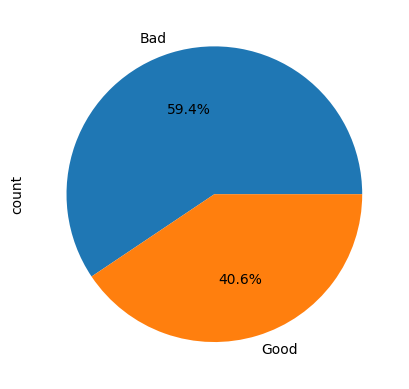

In [91]:
status_counts = df['Sales_Status'].value_counts()
status_counts.plot(kind='pie',autopct='%1.1f%%')

<b> 12. Identify the branch that exceeded the average number of products sold.

In [93]:
q12 = """SELECT branch, AVG(quantity) AS branch_product_average
FROM amazon
GROUP BY branch
HAVING AVG(quantity) > (SELECT AVG(quantity) FROM amazon);"""

In [94]:
data=pd.read_sql(q12,connection)

In [95]:
data

,branch,branch_product_average
0,C,5.5823


<b> 13. Which product line is most frequently associated with each gender?

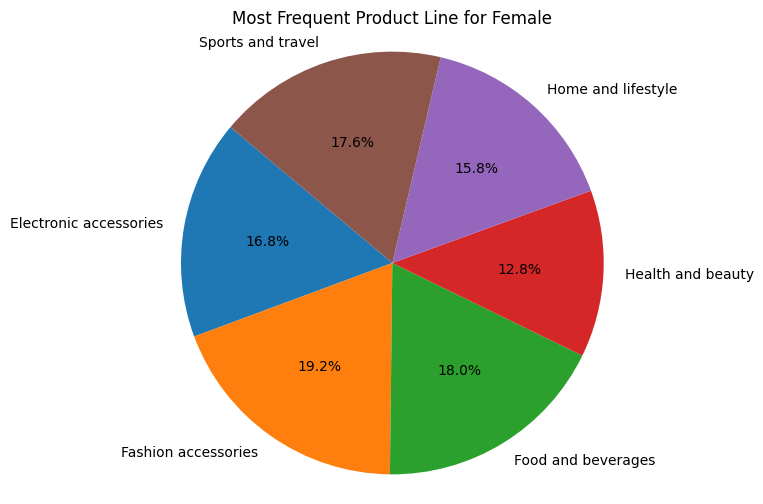

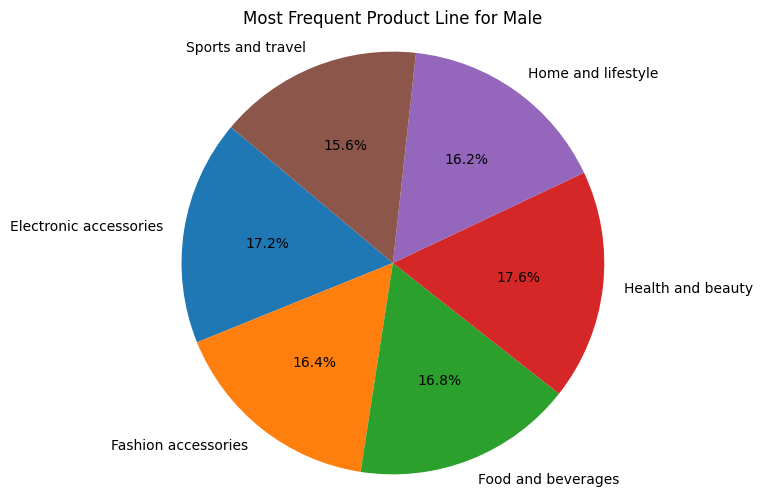

In [104]:
amazon_data_sorted = df.sort_values(by='Gender')
gender_product_counts = amazon_data_sorted.groupby(['Gender', 'Product_line']).size()
gender_product_counts = gender_product_counts.reset_index(name='Count')
genders = gender_product_counts['Gender'].unique()
for gender in genders:
    gender_data = gender_product_counts[gender_product_counts['Gender'] == gender]
    plt.figure(figsize=(6, 6))
    plt.pie(gender_data['Count'], labels=gender_data['Product_line'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Most Frequent Product Line for {gender}')
    plt.axis('equal')
    plt.show()

<b> 14. Calculate the average rating for each product line.

In [123]:
q14 = """SELECT product_line, ROUND(AVG(rating),2) AS average_rating
FROM amazon
GROUP BY product_line
ORDER BY average_rating DESC;"""

In [124]:
data=pd.read_sql(q14,connection)

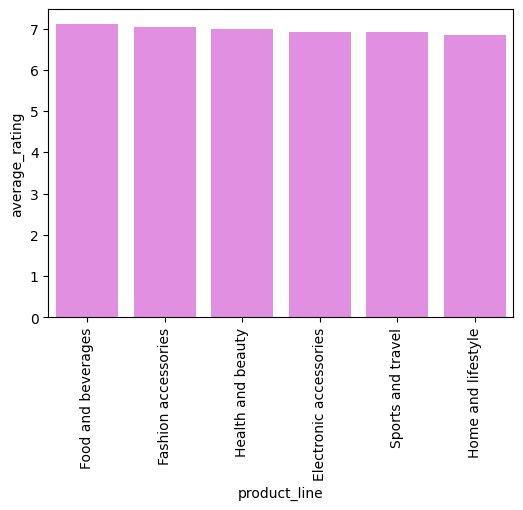

In [125]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data,x='product_line',y='average_rating', color='violet')
plt.xticks(rotation='vertical')
plt.show()

<b> 15. Count the sales occurrences for each time of day on every weekday.

In [122]:
q15 = """SELECT timeofday, dayname, COUNT(*) AS sales_occurrences
FROM amazon
WHERE dayname!='SUN' AND dayname!='SAT'
GROUP BY timeofday, dayname
ORDER BY dayname, timeofday;"""

In [126]:
data=pd.read_sql(q15,connection)

In [127]:
data

,timeofday,dayname,sales_occurrences
0,Afternoon,FRI,74
1,Evening,FRI,36
2,Morning,FRI,29
3,Afternoon,MON,75
4,Evening,MON,29
5,Morning,MON,21
6,Afternoon,THU,76
7,Evening,THU,29
8,Morning,THU,33
9,Afternoon,TUE,71


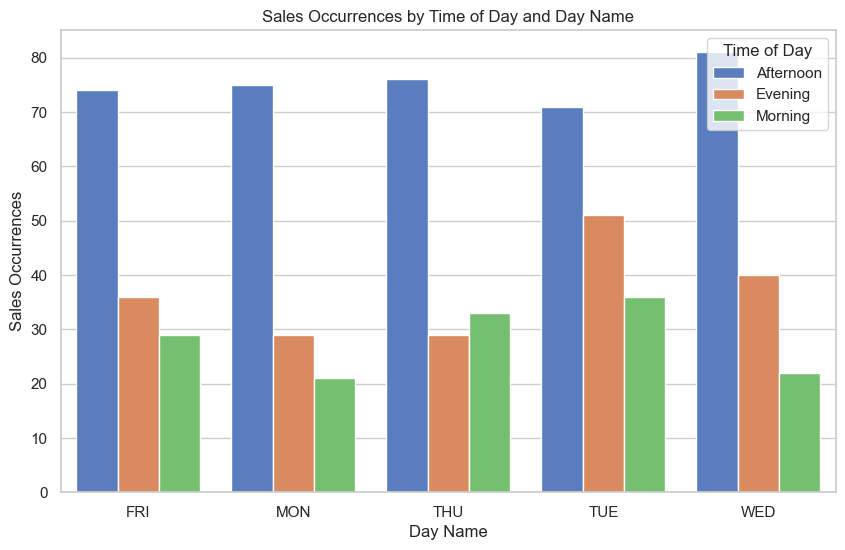

In [128]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='dayname', y='sales_occurrences', hue='timeofday', data=data, palette='muted')
plt.title('Sales Occurrences by Time of Day and Day Name')
plt.xlabel('Day Name')
plt.ylabel('Sales Occurrences')
plt.legend(title='Time of Day')
plt.show()

<b> 16. Identify the customer type contributing the highest revenue.

In [134]:
q16 = """SELECT customer_type, SUM(quantity*unit_price) AS total_revenue
FROM amazon
GROUP BY customer_type
ORDER BY total_revenue DESC
LIMIT 2;"""

In [135]:
data=pd.read_sql(q16,connection)

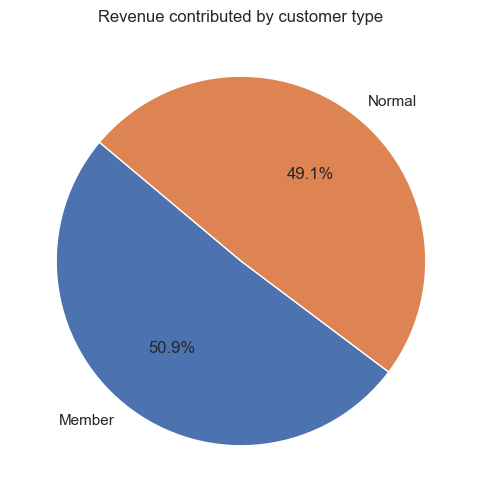

In [138]:
plt.figure(figsize=(6, 6))
plt.pie(data['total_revenue'], labels=data['customer_type'], autopct='%1.1f%%', startangle=140)
plt.title(f'Revenue contributed by customer type')
plt.show()

<b> 17. Determine the city with the highest VAT percentage.

In [140]:
q17 = """SELECT city, ROUND(AVG((vat / total) * 100),2) AS vat_percentage
FROM amazon
GROUP BY city
ORDER BY vat_percentage DESC
LIMIT 5;"""

In [143]:
data=pd.read_sql(q17,connection)

In [144]:
data

,city,vat_percentage
0,Naypyitaw,4.80
1,Mandalay,4.79
2,Yangon,4.78


<b> 18. Identify the customer type with the highest VAT payments.

In [146]:
q18 = """SELECT customer_type, ROUND(SUM(vat),2) AS total_VAT_payments
FROM amazon
GROUP BY customer_type
ORDER BY total_VAT_payments DESC
LIMIT 4;"""

In [147]:
data=pd.read_sql(q18,connection)

In [150]:
data

,customer_type,total_VAT_payments
0,Member,7824.0
1,Normal,7558.0


<b> 19. What is the count of distinct customer types in the dataset?

In [161]:
df['Customer_type'].value_counts()

Customer_type
Member    501
Normal    499
Name: count, dtype: int64

<b> 20. What is the count of distinct payment methods in the dataset?

<Axes: ylabel='count'>

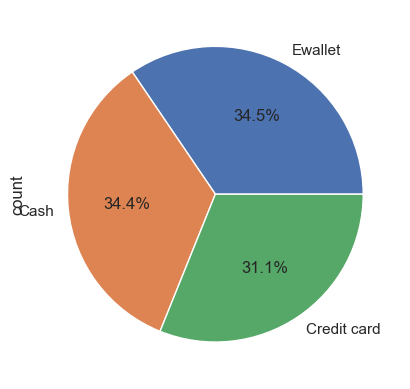

In [167]:
df['Payment'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<b> 21. Which customer type occurs most frequently?

In [171]:
customer_type_counts = df['Customer_type'].value_counts()
customer_type_counts

Customer_type
Member    501
Normal    499
Name: count, dtype: int64

In [175]:
most_frequent_customer_type = customer_type_counts.idxmax()
print("The customer type that occurs most frequently is:", most_frequent_customer_type)

The customer type that occurs most frequently is: Member


<b> 22. Identify the customer type with the highest purchase frequency.

In [180]:
q22 = """SELECT customer_type, SUM(quantity) AS total_purchase_frequency
FROM amazon
GROUP BY customer_type
ORDER BY total_purchase_frequency DESC
LIMIT 5;"""

In [181]:
data=pd.read_sql(q22,connection)

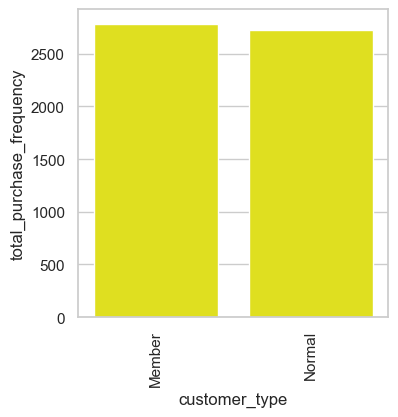

In [183]:
plt.figure(figsize=(4, 4))
sns.barplot(data=data,x='customer_type',y='total_purchase_frequency', color='yellow')
plt.xticks(rotation='vertical')
plt.show()

<b> 23. Determine the predominant gender among customers.

<Axes: ylabel='count'>

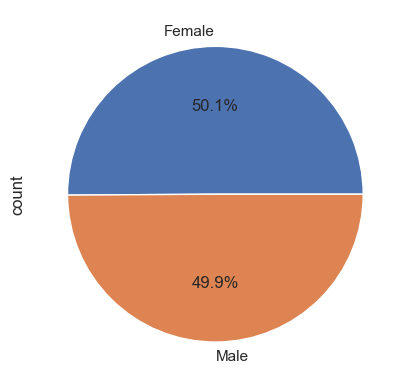

In [186]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<b> 24. Examine the distribution of genders within each branch.

In [189]:
q24 = """SELECT branch, gender, COUNT(*) AS gender_count
FROM amazon
GROUP BY branch, gender;"""

In [190]:
data=pd.read_sql(q24,connection)

In [191]:
data

,branch,gender,gender_count
0,A,Female,161
1,C,Female,178
2,A,Male,179
3,C,Male,150
4,B,Female,162
5,B,Male,170


<b> 25. Identify the time of day when customers provide the most ratings.

In [194]:
q25 = """SELECT timeofday, COUNT(rating) AS rating_count
FROM amazon
WHERE rating IS NOT NULL
GROUP BY timeofday
ORDER BY rating_count DESC
LIMIT 4;"""

In [195]:
data=pd.read_sql(q25,connection)

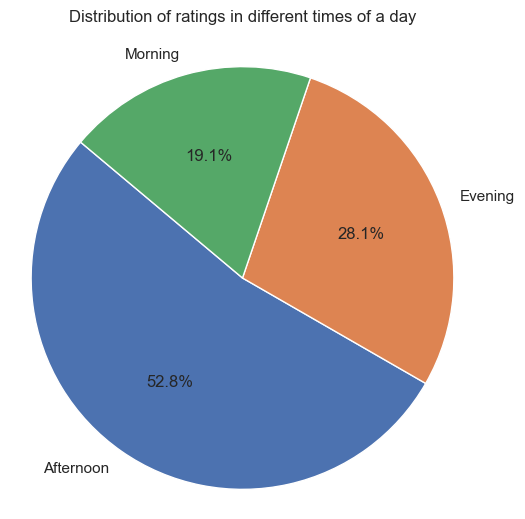

In [198]:
plt.figure(figsize=(6, 6))
plt.pie(data['rating_count'], labels=data['timeofday'], autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of ratings in different times of a day\n')
plt.axis('equal')
plt.show()

<b> 26. Determine the time of day with the highest customer ratings for each branch.

In [202]:
q26 = """WITH RankedTimes AS (
SELECT branch, timeofday, COUNT(rating) AS rating_count,
RANK() OVER (PARTITION BY branch ORDER BY COUNT(rating) DESC) AS branch_rank
FROM amazon
WHERE rating IS NOT NULL
GROUP BY branch, timeofday
)
SELECT branch, timeofday, rating_count
FROM RankedTimes
WHERE branch_rank = 1;"""

In [203]:
data=pd.read_sql(q26,connection)

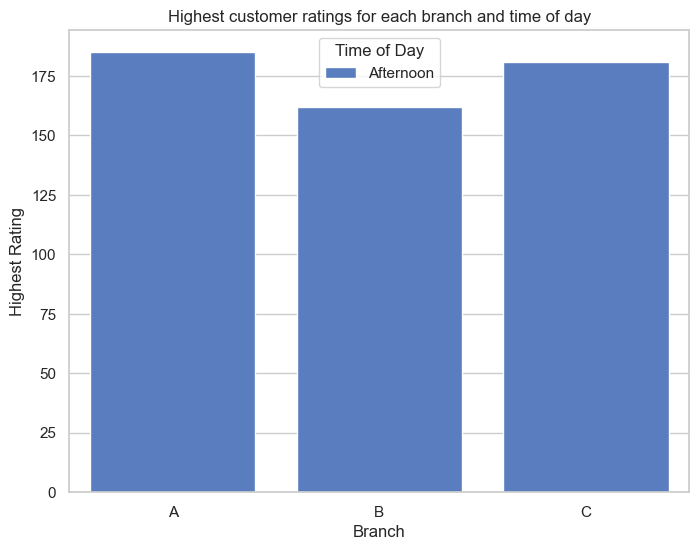

In [206]:
plt.figure(figsize=(8, 6))
sns.barplot(x='branch', y='rating_count', hue='timeofday', data=data, palette='muted')
plt.title('Highest customer ratings for each branch and time of day')
plt.xlabel('Branch')
plt.ylabel('Highest Rating')
plt.legend(title='Time of Day')
plt.show()